In [15]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [16]:
def show(img):
    plt.figure(figsize=(6,4),dpi=120)
    plt.xticks([]),plt.yticks([])
    plt.imshow(imutils.opencv2matplotlib(img))

In [17]:
#导入lena图像并转化成灰度图
lena=cv.imread('/Users/lixuecheng/Downloads/OpenCV/代码+资料/第2-7章notebook课件/图像操作/lena.png',0)
#对lena进行转换成float32格式
lena32=np.float32(lena)

In [18]:
dft_lena=cv.dft(lena32,flags=cv.DFT_COMPLEX_OUTPUT)
#将低频信息从左上角移动到中间位置
lena_shift=np.fft.fftshift(dft_lena)


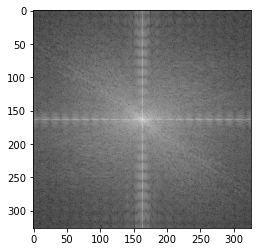

In [19]:
#使用cv2.magnitude将实部和虚部转换为实部，乘以20是为了使得结果更大。转换成能表示的灰度图
magnitude_lena=20*np.log(cv.magnitude(lena_shift[:,:,0],lena_shift[:,:,1]))
plt.imshow(magnitude_lena,cmap='gray')

(<AxesSubplot:title={'center':'magnitude_Spectrum'}>,
 Text(0.5, 1.0, 'magnitude_Spectrum'),
 <matplotlib.image.AxesImage at 0x153e63190>)

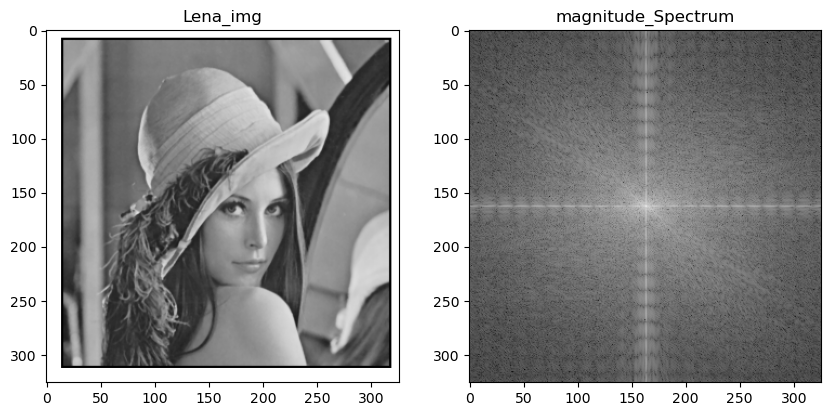

In [20]:
plt.figure(dpi=100,figsize=(10,8))
plt.subplot(121),plt.title("Lena_img"),plt.imshow(imutils.opencv2matplotlib(lena))
plt.subplot(122),plt.title("magnitude_Spectrum"),plt.imshow(magnitude_lena,cmap='gray')

In [21]:
#获取lena图像的行数列数
row,col=lena.shape

In [22]:
#获取中心点的坐标
mid_row,mid_col=int(row/2),int(col/2)

In [23]:
#低通滤波;(row,col,2)中2代表的是两个颜色通道
mask=np.zeros((row,col,2),np.uint8)
mask[mid_row-30:mid_row+30,mid_col-30:mid_col+30]=1

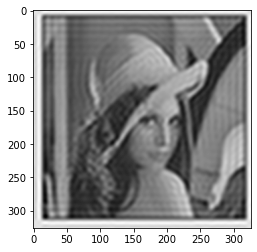

In [24]:

i_lena_shift=lena_shift*mask

#再把低频还原回去
fft_i_lena_shift=np.fft.fftshift(i_lena_shift)

#进行逆向变换Idft
img_back=cv.idft(fft_i_lena_shift)

img_back=cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.imshow(img_back,cmap='gray')

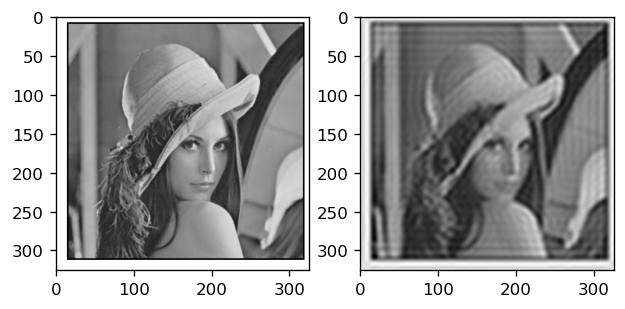

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x153da93d0>, None)

In [25]:
plt.figure(dpi=120)
plt.xticks([]),plt.yticks([])
plt.subplot(121),plt.imshow(imutils.opencv2matplotlib(lena))
plt.subplot(122),plt.imshow(img_back,cmap='gray'),plt.show()

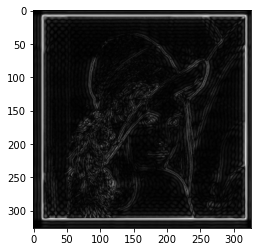

In [26]:
#高频

#高频mask的意思就是我的矩阵除了中心点附近的都是0之外都是1，和低通滤波的矩阵正好相反
mask=np.ones((row,col,2),np.uint8)
mask[mid_row-30:mid_row+30,mid_col-30:mid_col+30]=0


i_lena_shift=lena_shift*mask

#再把低频还原回去
fft_i_lena_shift=np.fft.fftshift(i_lena_shift)

#进行逆向变换Idft
img_back=cv.idft(fft_i_lena_shift)

img_back=cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.imshow(img_back,cmap='gray')

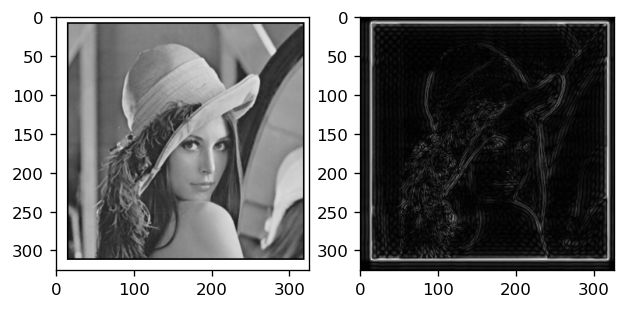

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x154ae32b0>, None)

In [27]:
plt.figure(dpi=120)
plt.xticks([]),plt.yticks([])
plt.subplot(121),plt.imshow(imutils.opencv2matplotlib(lena))
plt.subplot(122),plt.imshow(img_back,cmap='gray'),plt.show()